In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/data.xlsx'  # Replace with your file path
data = pd.read_excel(file_path, sheet_name=1, header=None)  # Load the second sheet (index 1)

data = data.dropna(how='all')  # Drop rows where all elements are NaN

# Drop the first row (index 0)
data = data.drop(index=0)

# Drop the first column (index 0)
data = data.drop(columns=0)

# Reset the index to clean up
data.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(data.head())

                       1                       2                3          4   \
0  Is an Opportunity Zone  Census Tract FIPS code           County      State   
1                     Yes             47037013601  Davidson County  Tennessee   
2                     Yes             47037013601  Davidson County  Tennessee   
3                     Yes             47037013601  Davidson County  Tennessee   
4                     Yes             47037013601  Davidson County  Tennessee   

     5                       6       7          8      9             10  ...  \
0  Year  Inclusive Growth Score  Growth  Inclusion  Place  Place Growth  ...   
1  2020                      38      37         39     54            48  ...   
2  2021                      43      48         38     60            58  ...   
3  2022                      44      47         40     56            48  ...   
4  2023                      46      58         33     57            58  ...   

                              47

In [ ]:
# Set the first row as the header
data.columns = data.iloc[0]
data = data[1:]

# Clean column names (remove spaces)
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Convert relevant columns to appropriate data types
data['Year'] = data['Year'].astype(int)
data['Inclusive_Growth_Score'] = pd.to_numeric(data['Inclusive_Growth_Score'], errors='coerce')

# Display the cleaned DataFrame
print(data.head())

0 Is_an_Opportunity_Zone Census_Tract_FIPS_code           County      State  \
1                    Yes            47037013601  Davidson County  Tennessee   
2                    Yes            47037013601  Davidson County  Tennessee   
3                    Yes            47037013601  Davidson County  Tennessee   
4                    Yes            47037013601  Davidson County  Tennessee   
5                    Yes            47037013602  Davidson County  Tennessee   

0  Year  Inclusive_Growth_Score Growth Inclusion Place Place_Growth  ...  \
1  2020                      38     37        39    54           48  ...   
2  2021                      43     48        38    60           58  ...   
3  2022                      44     47        40    56           48  ...   
4  2023                      46     58        33    57           58  ...   
5  2020                      20     12        27    27            1  ...   

0 Female_Above_Poverty_Tract,_% Gini_Coefficient_Score Gini_Coeffici

<ipython-input-30-69e0d356adc6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Year'].astype(int)
<ipython-input-30-69e0d356adc6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Inclusive_Growth_Score'] = pd.to_numeric(data['Inclusive_Growth_Score'], errors='coerce')


In [ ]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


0
Is_an_Opportunity_Zone                       8
Residential_Real_Estate_Value_Score         11
Residential_Real_Estate_Value_Tract,_%      11
Minority/Women_Owned_Businesses_Score        4
Minority/Women_Owned_Businesses_Base,_%      4
Minority/Women_Owned_Businesses_Tract,_%     4
Spending_per_Capita_Base,_%                 20
Spending_per_Capita_Tract,_%                20
Early_Education_Enrollment_Score             3
Early_Education_Enrollment_Tract,_%          3
dtype: int64


In [ ]:

# Identify columns with missing values greater than 5
cols_to_drop = missing_values[missing_values > 0].index.tolist()

# Drop those columns
data.drop(columns=cols_to_drop, inplace=True)

# Display the updated DataFrame
print(data.head())

0 Census_Tract_FIPS_code           County      State  Year  \
1            47037013601  Davidson County  Tennessee  2020   
2            47037013601  Davidson County  Tennessee  2021   
3            47037013601  Davidson County  Tennessee  2022   
4            47037013601  Davidson County  Tennessee  2023   
5            47037013602  Davidson County  Tennessee  2020   

0  Inclusive_Growth_Score Growth Inclusion Place Place_Growth Place_Inclusion  \
1                      38     37        39    54           48              59   
2                      43     48        38    60           58              63   
3                      44     47        40    56           48              64   
4                      46     58        33    57           58              56   
5                      20     12        27    27            1              53   

0  ... Female_Above_Poverty_Score Female_Above_Poverty_Base,_%  \
1  ...                          3                         87.5   
2  ...  

<ipython-input-32-aed2bad81fa2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=cols_to_drop, inplace=True)


**Exploratory Data Analysis**

In [ ]:
data.groupby('Census_Tract_FIPS_code')['Inclusive_Growth_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Census_Tract_FIPS_code,,,,,,,,
47037013601,4.0,42.75,3.403430,38.0,41.75,43.5,44.50,46.0
47037013602,4.0,35.25,11.116804,20.0,30.50,38.5,43.25,44.0
47037014200,4.0,34.50,4.203173,30.0,31.50,34.5,37.50,39.0
47037014300,4.0,40.50,3.415650,36.0,39.00,41.0,42.50,44.0
47037014400,4.0,56.75,3.774917,53.0,55.25,56.0,57.50,62.0


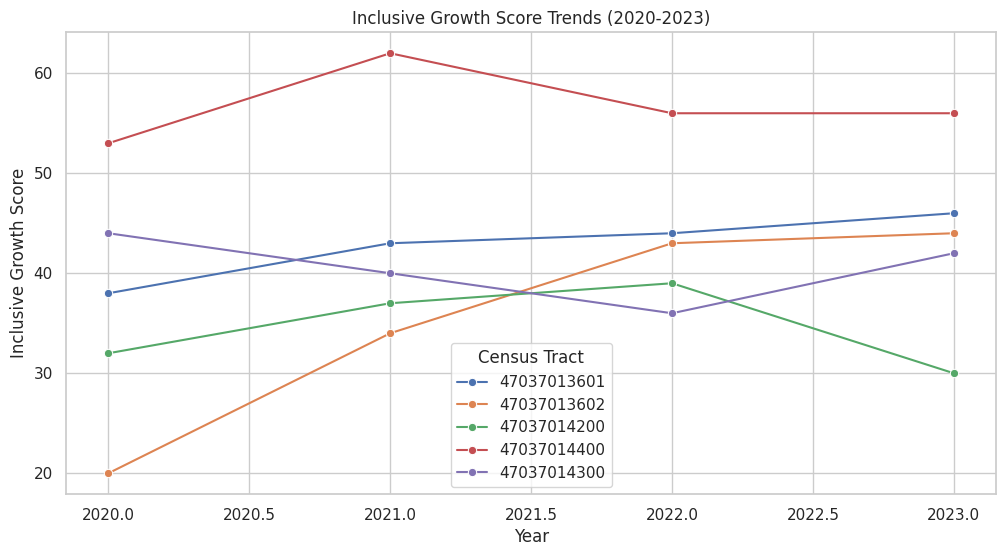

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Inclusive_Growth_Score', hue='Census_Tract_FIPS_code', marker='o')
plt.title('Inclusive Growth Score Trends (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Inclusive Growth Score')
plt.legend(title='Census Tract')
plt.show()

**Comparative Analysis**

In [ ]:
#Mean Score Comaparison

mean_scores = data.groupby('Census_Tract_FIPS_code')['Inclusive_Growth_Score'].mean().reset_index()
print(mean_scores)

  Census_Tract_FIPS_code  Inclusive_Growth_Score
0            47037013601                   42.75
1            47037013602                   35.25
2            47037014200                   34.50
3            47037014300                   40.50
4            47037014400                   56.75


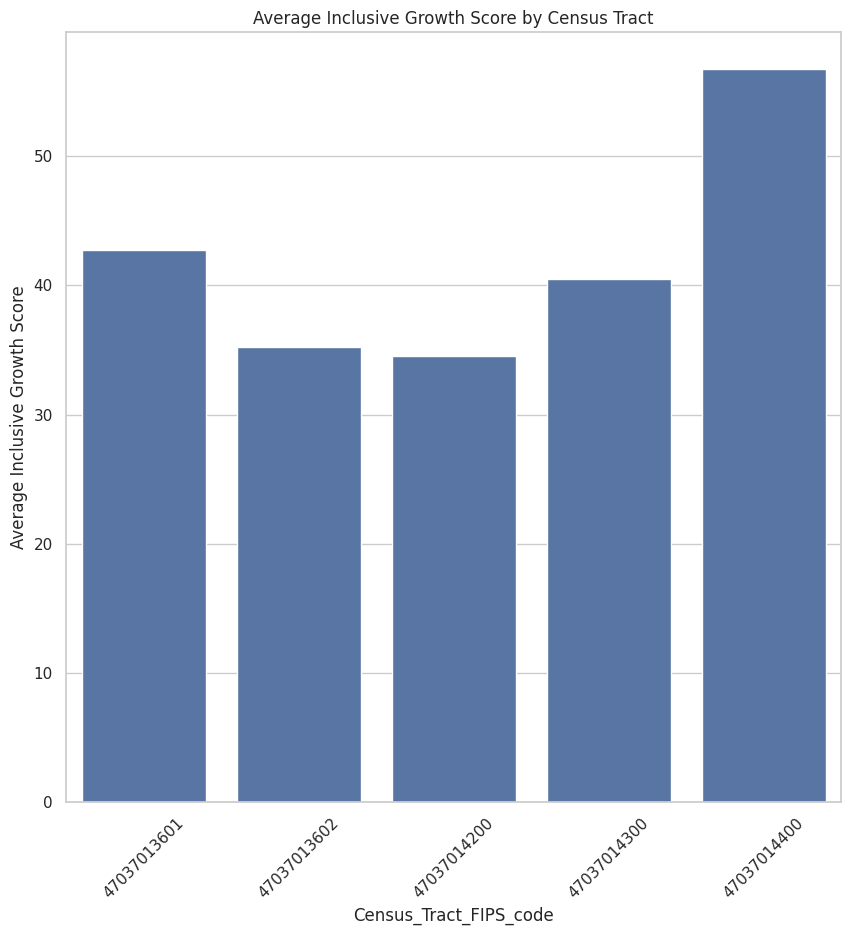

In [ ]:
#Visualize Comparisons

plt.figure(figsize=(10,10))
sns.barplot(x='Census_Tract_FIPS_code', y='Inclusive_Growth_Score', data=mean_scores)
plt.title('Average Inclusive Growth Score by Census Tract')
plt.xticks(rotation=45)
plt.ylabel('Average Inclusive Growth Score')
plt.show()

**Time Series Analysis**

In [ ]:
#Yearly Comparison
data['Yearly_Growth_Rate'] = data.groupby('Census_Tract_FIPS_code')['Inclusive_Growth_Score'].pct_change() * 100

<Axes: xlabel='Year', ylabel='Yearly_Growth_Rate'>

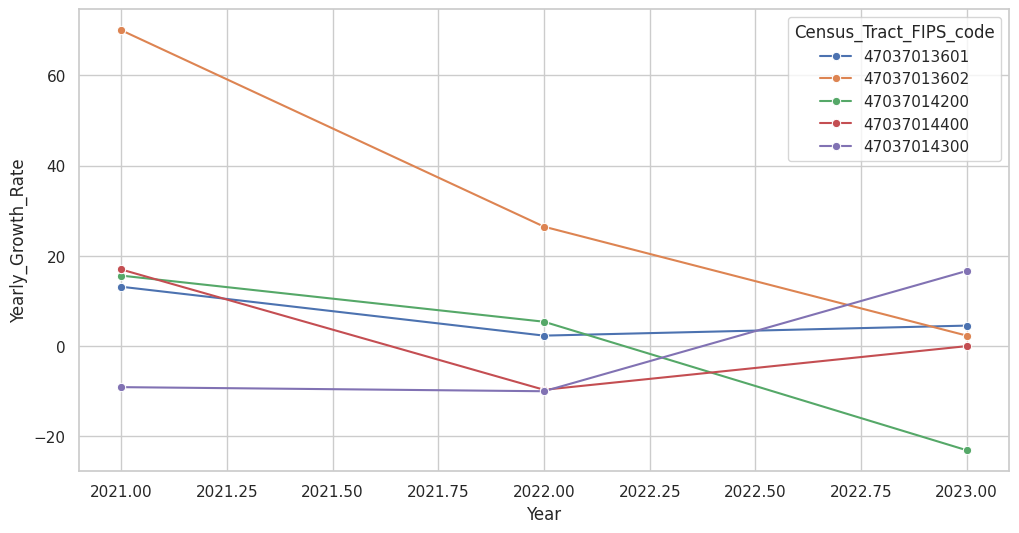

In [ ]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Yearly_Growth_Rate', hue='Census_Tract_FIPS_code', marker='o')

**Coorelation Analysis**

In [ ]:
# Step 1: Calculate the mean Inclusive Growth Score and pillars for each Census Tract
mean_data = data.groupby('Census_Tract_FIPS_code')[['Inclusive_Growth_Score', 'Place', 'Economy', 'Community']].mean().reset_index()

# Step 2: Drop the Census Tract FIPS code for correlation calculation
mean_data_corr = mean_data.drop(columns=['Census_Tract_FIPS_code'])

# Step 3: Calculate the correlation matrix
mean_correlation = mean_data_corr.corr()

# Step 4: Display the mean correlation matrix
print("Mean Correlation:\n", mean_correlation)



Mean Correlation:
 0                       Inclusive_Growth_Score     Place   Economy  Community
0                                                                            
Inclusive_Growth_Score                1.000000  0.528754  0.857511   0.880353
Place                                 0.528754  1.000000  0.084822   0.293457
Economy                               0.857511  0.084822  1.000000   0.725037
Community                             0.880353  0.293457  0.725037   1.000000


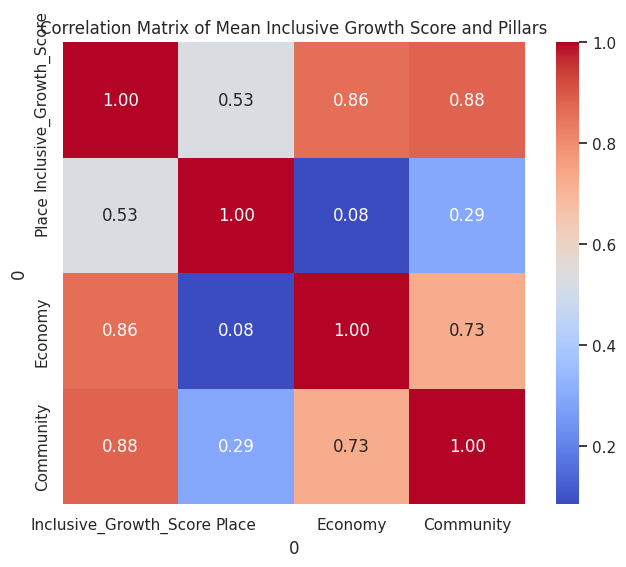

In [ ]:
# Step 4: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mean_correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Mean Inclusive Growth Score and Pillars')
plt.show()

In the analysis of the mean correlation between the Inclusive Growth Score and the three pillars (Place, Economy, Community), the following key findings were observed:

	•	The strongest correlation is between the Community pillar and the Inclusive Growth Score (0.88). This indicates a strong positive relationship, suggesting that increases in community conditions are associated with higher inclusive growth scores.
	•	The Economy pillar also shows a strong positive correlation with the Inclusive Growth Score (0.86), indicating that improvements in economic conditions are similarly linked to higher inclusive growth outcomes.
	•	The correlation between the Place pillar and the Inclusive Growth Score is positive but weaker (0.53), suggesting that while there is a relationship, it is less pronounced compared to the other two pillars.

Overall, the results indicate that enhancing both the Community and Economy pillars is likely to contribute positively to the Inclusive Growth Score in the analyzed census tracts. The relationship is predominantly positive, meaning that improvements in these pillars are associated with increases in the Inclusive Growth Score.

**Relationship shown through Scatter Plots**

In [ ]:
# Convert columns to numeric
mean_data['Place'] = pd.to_numeric(mean_data['Place'], errors='coerce')
mean_data['Economy'] = pd.to_numeric(mean_data['Economy'], errors='coerce')
mean_data['Community'] = pd.to_numeric(mean_data['Community'], errors='coerce')

# Check the data types again to confirm the conversion
print(mean_data.dtypes)

0
Census_Tract_FIPS_code     object
Inclusive_Growth_Score    float64
Place                     float64
Economy                   float64
Community                 float64
dtype: object


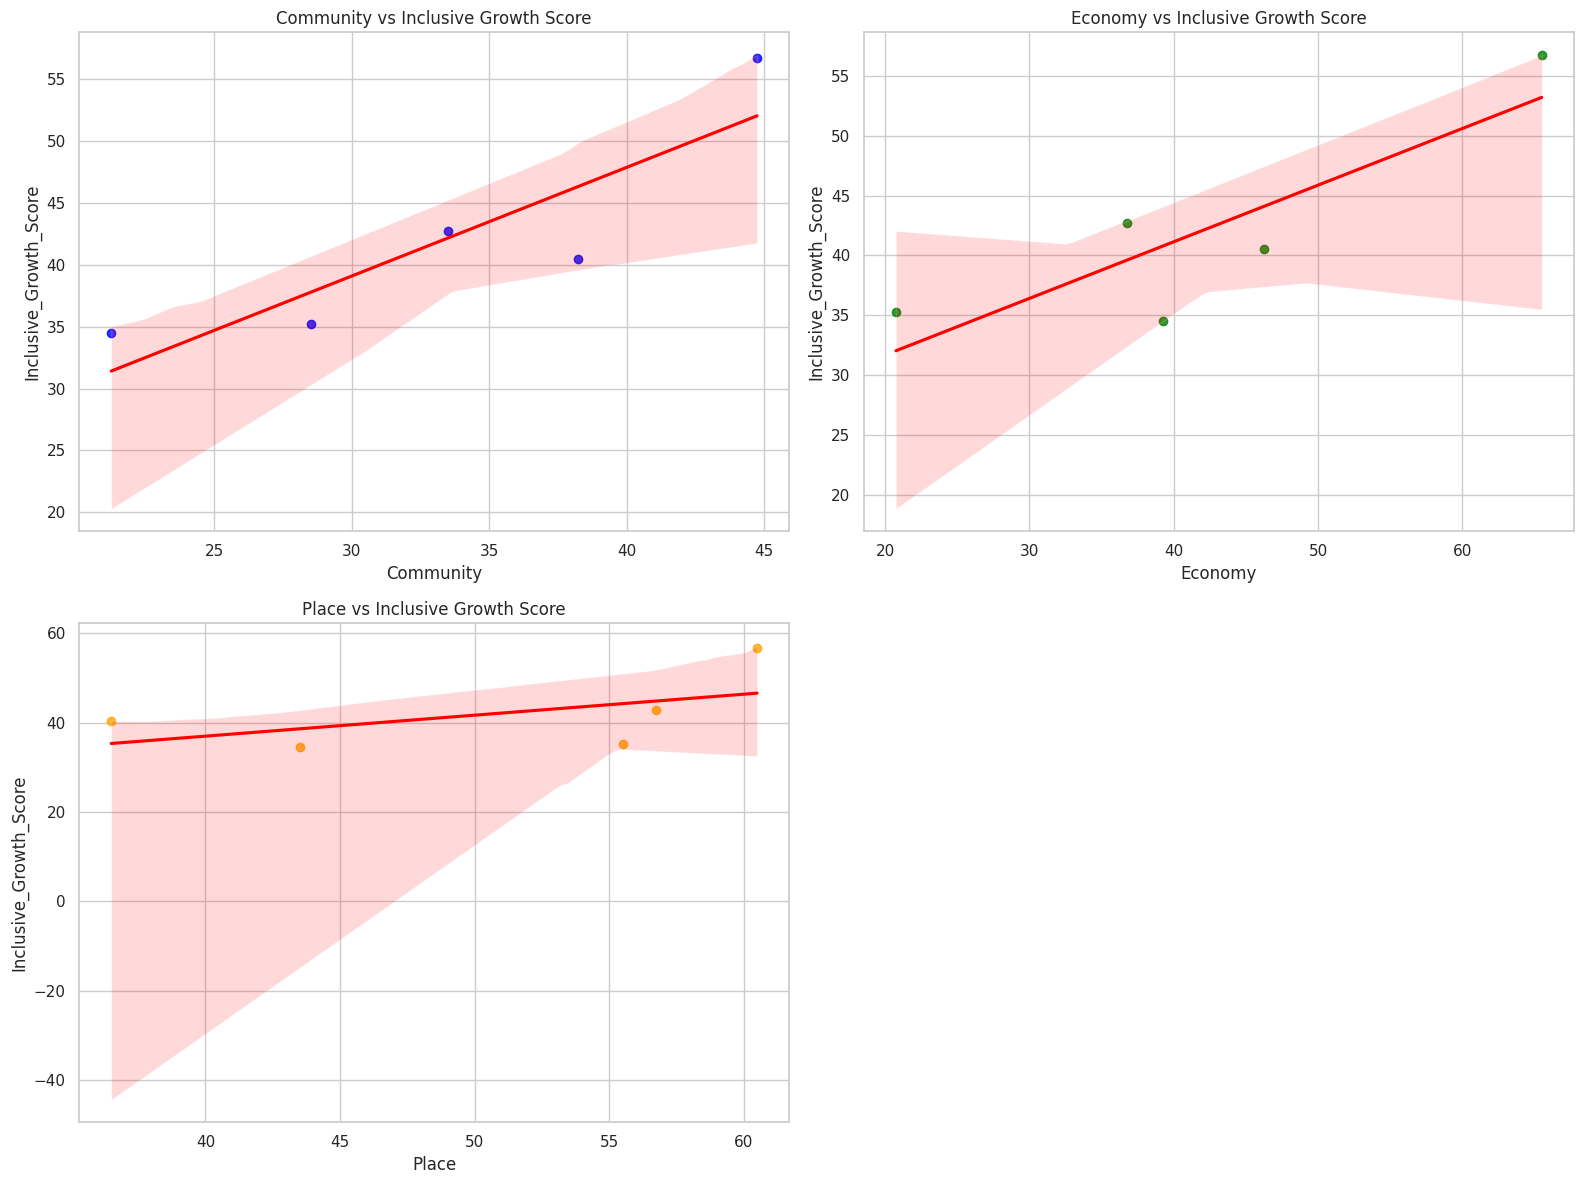

In [ ]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Create scatter plots with regression lines
plt.figure(figsize=(16, 12))

# Scatter plot for Community vs Inclusive Growth Score
plt.subplot(2, 2, 1)
sns.regplot(x='Community', y='Inclusive_Growth_Score', data=mean_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Community vs Inclusive Growth Score')

# Scatter plot for Economy vs Inclusive Growth Score
plt.subplot(2, 2, 2)
sns.regplot(x='Economy', y='Inclusive_Growth_Score', data=mean_data, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Economy vs Inclusive Growth Score')

# Scatter plot for Place vs Inclusive Growth Score
plt.subplot(2, 2, 3)
sns.regplot(x='Place', y='Inclusive_Growth_Score', data=mean_data, scatter_kws={'color': 'orange'}, line_kws={'color': 'red'})
plt.title('Place vs Inclusive Growth Score')

plt.tight_layout()
plt.show()

**Analysis of Community Pillar**

In [ ]:
community_metrics = [
    'Personal_Income_Score',
    'Spending_per_Capita_Score',
    'Female_Above_Poverty_Score',
    'Gini_Coefficient_Score',
    'Health_Insurance_Coverage_Score',
    'Community'
]

mean_community_data = data.groupby('Census_Tract_FIPS_code')[community_metrics].mean().reset_index()

# Sort by Community Score to find top tracts
high_community_tracts = mean_community_data.sort_values(by='Community', ascending=False)
print(high_community_tracts)

0 Census_Tract_FIPS_code Personal_Income_Score Spending_per_Capita_Score  \
4            47037014400                 70.25                     63.25   
3            47037014300                  64.5                     56.25   
0            47037013601                 30.25                     58.75   
1            47037013602                  40.0                      28.5   
2            47037014200                 14.75                     41.75   

0 Female_Above_Poverty_Score Gini_Coefficient_Score  \
4                       16.0                   28.0   
3                      22.25                  16.25   
0                        1.5                  34.75   
1                       0.75                   51.0   
2                       0.25                   13.5   

0 Health_Insurance_Coverage_Score Community  
4                            19.5     44.75  
3                             2.5     38.25  
0                            16.5      33.5  
1                           

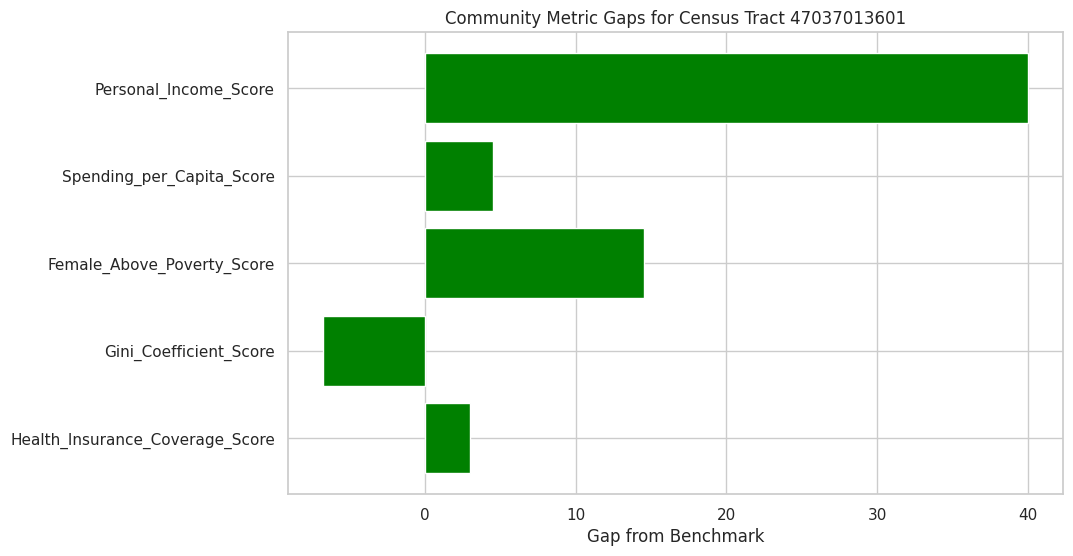

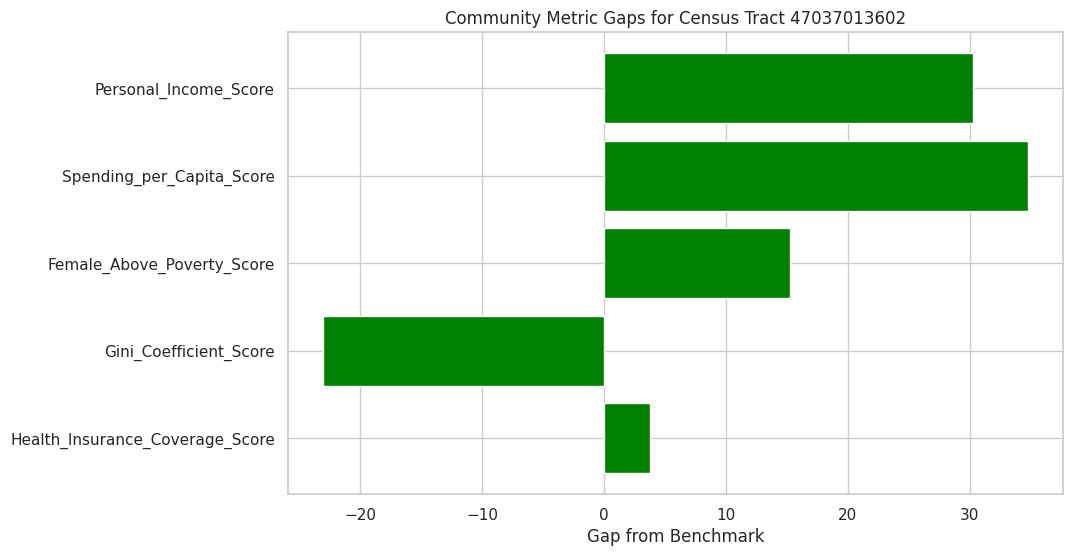

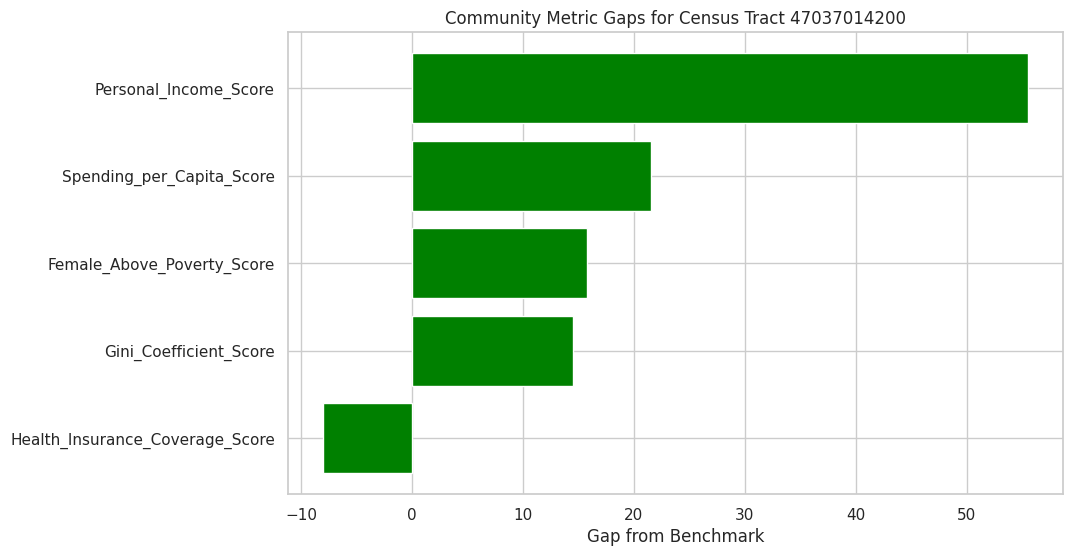

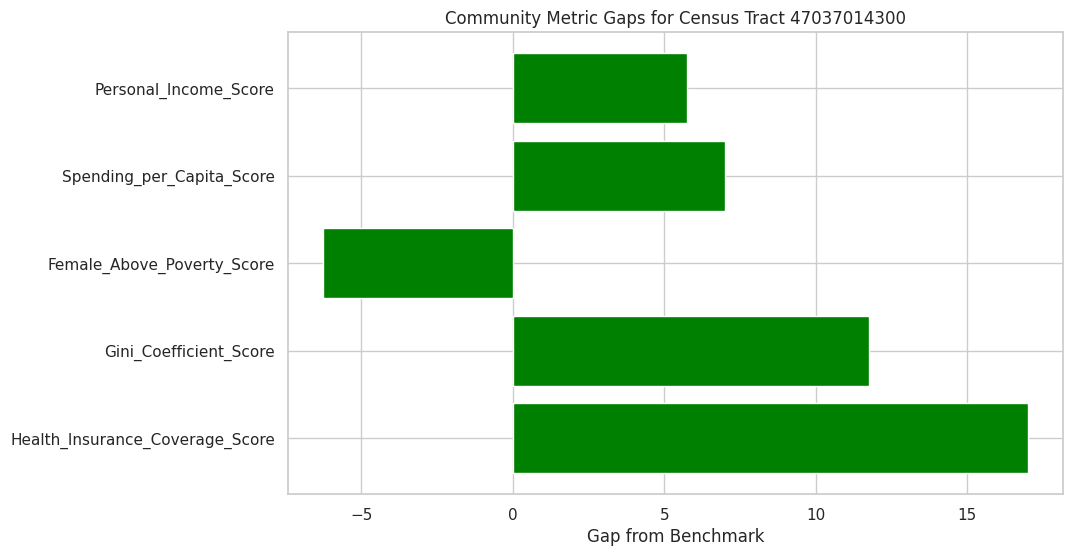

In [ ]:
# Step 1: Identify the benchmark tract with the highest Community score
benchmark_tract = mean_community_data.loc[mean_community_data['Community'].idxmax()]
benchmark_fips_code = benchmark_tract['Census_Tract_FIPS_code']

# Step 2: Calculate differences (gaps) between each tract and the benchmark tract
comparison = mean_community_data.copy()
for metric in community_metrics[:-1]:  # Exclude 'Community' itself
    comparison[metric + '_Gap'] = benchmark_tract[metric] - comparison[metric]

# Step 3: Filter out the benchmark tract from the gap data
gap_metrics = comparison[comparison['Census_Tract_FIPS_code'] != benchmark_fips_code]
gap_metrics = gap_metrics[['Census_Tract_FIPS_code'] + [m + '_Gap' for m in community_metrics[:-1]]]


# Step 4: Plot the gap for each remaining tract
for index, row in gap_metrics.iterrows():
    plt.figure(figsize=(10, 6))
    plt.barh(
        community_metrics[:-1],  # Exclude 'Community' itself
        row[1:],  # All gap values for this row
        color='green' if row[1:].max() > 0 else 'red'
    )
    plt.xlabel("Gap from Benchmark")
    plt.title(f"Community Metric Gaps for Census Tract {row['Census_Tract_FIPS_code']}")
    plt.gca().invert_yaxis()
    plt.show()

**Analysis of Economy Pillar**

In [ ]:
# Define economy metrics
economy_metrics = [
    'New_Businesses_Score',
    'Small_Business_Loans_Score',
    'Commercial_Diversity_Score',
    'Economy'
]

# Calculate the average economy metrics per census tract
mean_economy_data = data.groupby('Census_Tract_FIPS_code')[economy_metrics].mean().reset_index()

# Sort mean economy data by Economy Score in descending order for verification
sorted_economy_tracts = mean_economy_data.sort_values(by='Economy', ascending=False)
print(sorted_economy_tracts)


0 Census_Tract_FIPS_code New_Businesses_Score Small_Business_Loans_Score  \
4            47037014400                 62.5                      69.75   
3            47037014300                45.75                      48.75   
2            47037014200                 49.5                       43.5   
0            47037013601                47.25                      49.75   
1            47037013602                 29.0                       42.0   

0 Commercial_Diversity_Score Economy  
4                       85.5    65.5  
3                      10.75   46.25  
2                       24.5   39.25  
0                      19.75   36.75  
1                       3.25   20.75  


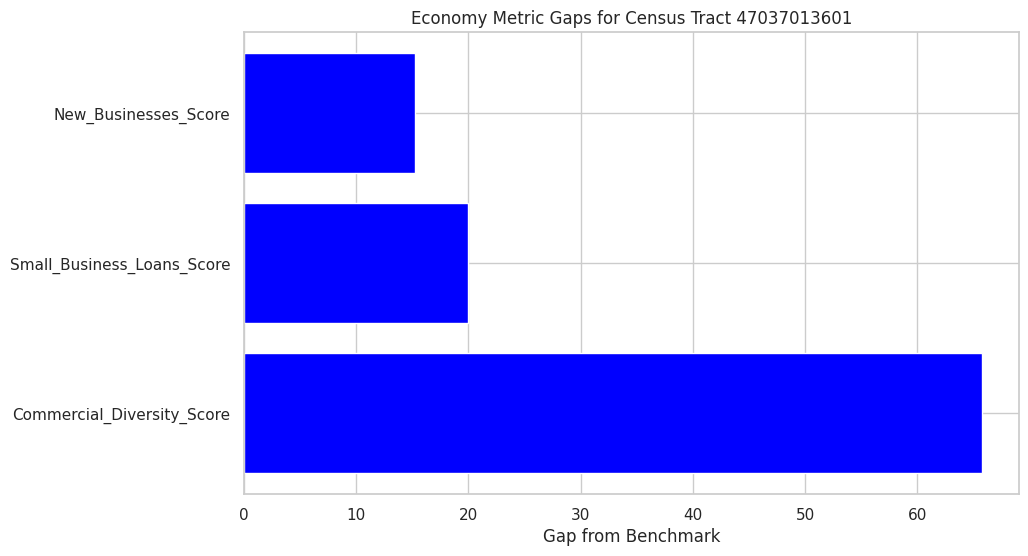

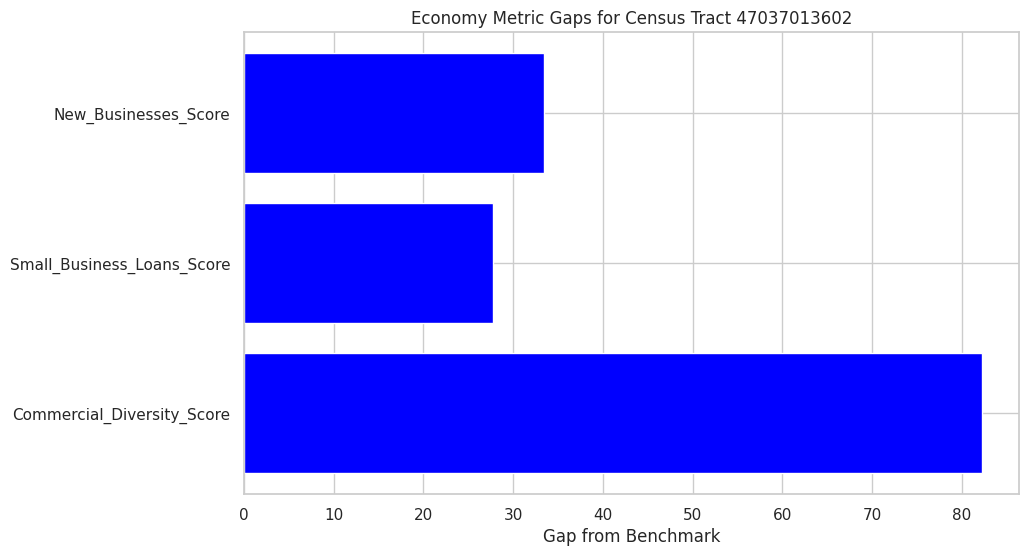

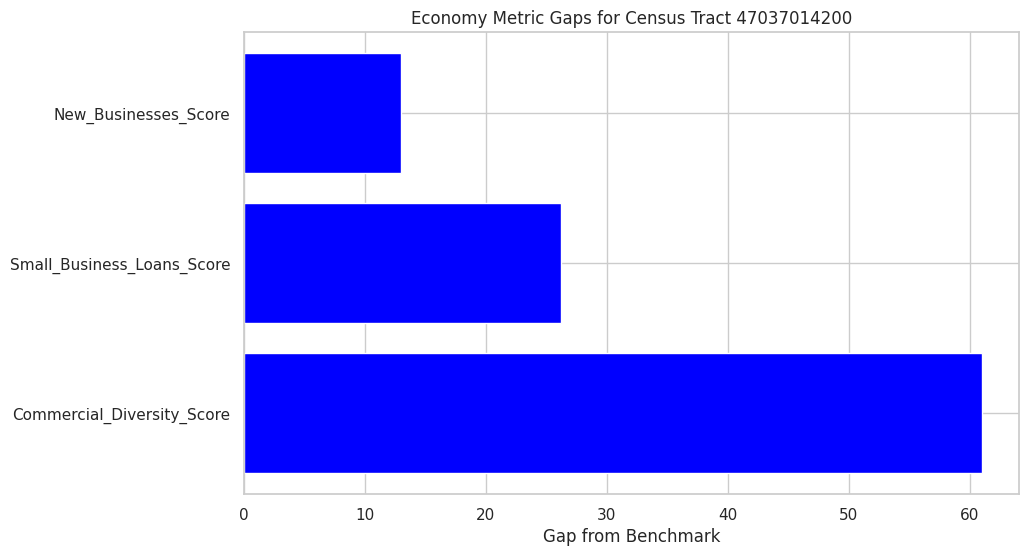

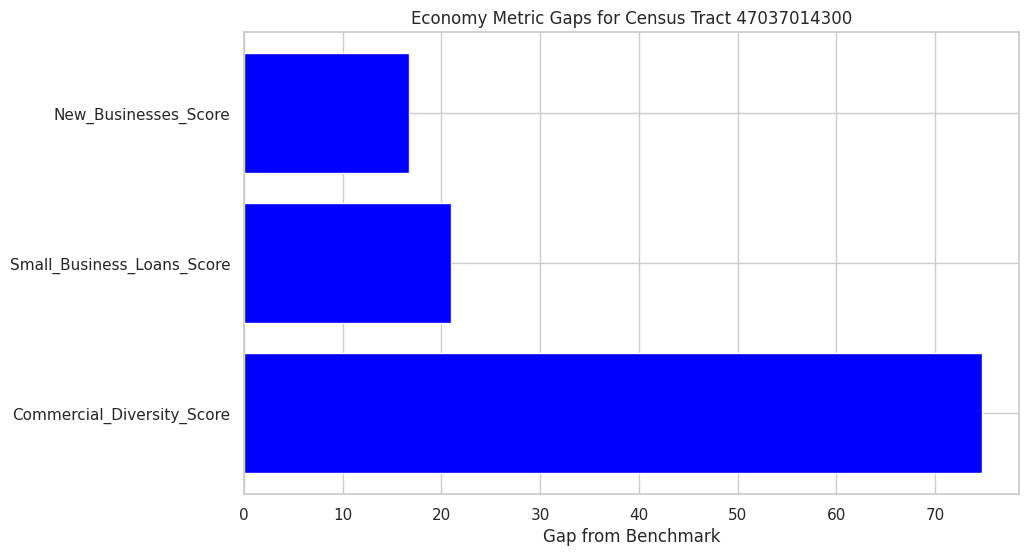

In [ ]:
# Step 1: Identify the benchmark tract with the highest Economy score
benchmark_tract_economy = mean_economy_data.loc[mean_economy_data['Economy'].idxmax()]
benchmark_fips_code = benchmark_tract_economy['Census_Tract_FIPS_code']

# Step 2: Calculate differences (gaps) between each tract and the benchmark tract
comparison_economy = mean_economy_data.copy()
for metric in economy_metrics[:-1]:  # Exclude 'Economy' itself
    comparison_economy[metric + '_Gap'] = benchmark_tract_economy[metric] - comparison_economy[metric]

# Step 3: Filter out the benchmark tract from the gap data
gap_metrics_economy = comparison_economy[comparison_economy['Census_Tract_FIPS_code'] != benchmark_fips_code]
gap_metrics_economy = gap_metrics_economy[['Census_Tract_FIPS_code'] + [m + '_Gap' for m in economy_metrics[:-1]]]

# Step 4: Plot the gap for each remaining tract
for index, row in gap_metrics_economy.iterrows():
    plt.figure(figsize=(10, 6))
    plt.barh(
        economy_metrics[:-1],  # Exclude 'Economy' itself
        row[1:],  # All gap values for this row
        color='blue' if row[1:].max() > 0 else 'red'
    )
    plt.xlabel("Gap from Benchmark")
    plt.title(f"Economy Metric Gaps for Census Tract {row['Census_Tract_FIPS_code']}")
    plt.gca().invert_yaxis()
    plt.show()

##Predictive Analysis Model

## Analysis summary

After analyzing the data, we found key gaps in metrics across census tracts: *Personal Income Score*, *Spending per Capita Score*, and *Gini Coefficient Score* from the Community pillar, and *Commercial Diversity Score* from the Economy pillar. These metrics are closely tied to income and business activity. Low commercial diversity likely contributes to lower personal income, reduced spending per capita, and higher income inequality. Our model will combine these metrics to predict the Inclusive Growth Score (IGS), with a focus on how improvements in these areas could impact IGS.


Data Preparation

In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# selection of relevant columns
data_selected = data[['Census_Tract_FIPS_code', 'Commercial_Diversity_Score', 'Personal_Income_Score',
                      'Spending_per_Capita_Score','Gini_Coefficient_Score', 'Inclusive_Growth_Score']]

# Select features (X) and target (y)
X = data_selected[['Commercial_Diversity_Score', 'Personal_Income_Score','Gini_Coefficient_Score', 'Spending_per_Capita_Score']]
y = data_selected['Inclusive_Growth_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Random Forest Model Training

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - Mean Squared Error: {mse}")
print(f"Random Forest - R-Squared: {r2}")


Random Forest - Mean Squared Error: 13.238650000000002
Random Forest - R-Squared: 0.7308533672172808


Hyperparameter Tuning with GridSearchCV

In [ ]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative MSE): {grid_search.best_score_}")

# Retrain the model with best parameters
best_rf_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Random Forest - MSE: {mse_best}")
print(f"Best Random Forest - R-Squared: {r2_best}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (Negative MSE): -40.29990476990742
Best Random Forest - MSE: 13.138387710459195
Best Random Forest - R-Squared: 0.7328917365090888


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


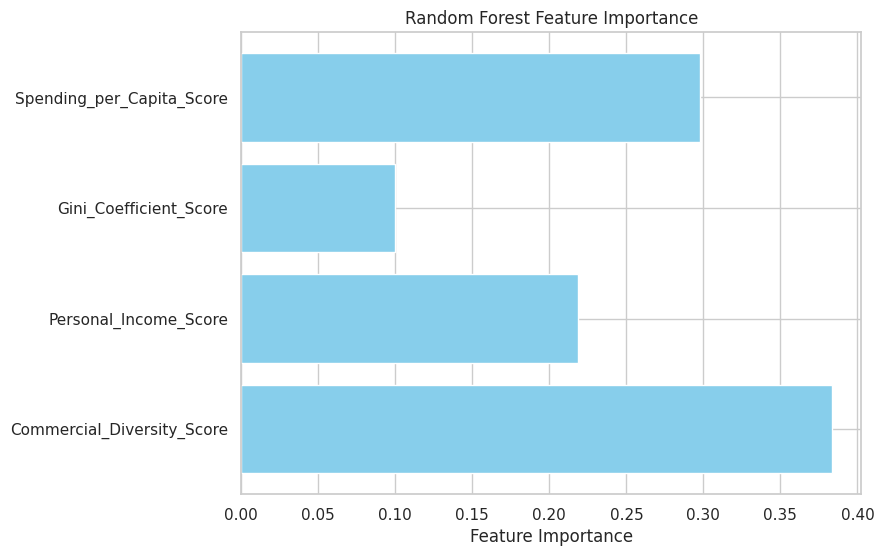

In [ ]:
# Extract feature importance from the model
importances = best_rf_model.feature_importances_

# Plot feature importance
features = X.columns
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


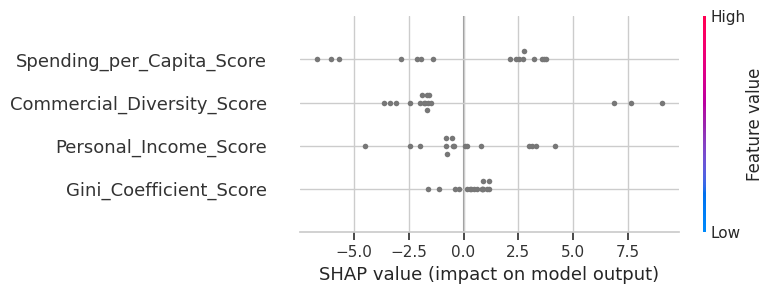

In [ ]:
import shap

# Initialize the SHAP TreeExplainer with the trained RandomForest model
explainer = shap.TreeExplainer(best_rf_model)

# Get the SHAP values for the training set
shap_values = explainer.shap_values(X_train)

# Create the SHAP summary plot
shap.summary_plot(shap_values, X_train)


In [ ]:

#each census tract with new data for each feature
new_data = pd.DataFrame({
    'Census_Tract_FIPS_code': [47037014200, 47037014300, 47037013601, 47037013602],
    'Commercial_Diversity_Score': [60.0, 70.0, 85.0, 75.0],
    'Personal_Income_Score': [80.0, 70.0, 85.0, 75.0],
    'Spending_per_Capita_Score': [55.0, 90.0, 60.0, 65.0],
    'Gini_Coefficient_Score': [10.0, 5.0, 15.0, 10.0]
})

# Predict IGS scores for new data
new_predictions = best_rf_model.predict(new_data[['Commercial_Diversity_Score', 'Personal_Income_Score', 'Gini_Coefficient_Score', 'Spending_per_Capita_Score']])

# Add predicted IGS scores to the new data
new_data['Predicted_IGS'] = new_predictions

# Output predictions with Census Tract and Predicted IGS
print(new_data[['Census_Tract_FIPS_code', 'Predicted_IGS']])


   Census_Tract_FIPS_code  Predicted_IGS
0             47037014200          56.82
1             47037014300          56.10
2             47037013601          56.08
3             47037013602          57.37
